# Comparison of Fibonacci sequence recursion and iteration methods

## 0 - Imports and config

In [1]:
from time import time

import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
terms = 10

## 1 - Recursive method

Pros:
* Neater and more compact (5 lines of code direcly related to the sequence)
* Uses less memory?

Cons:
* Called exponentially more times with growing n (n is the index of the Fibonacci sequence startinf from 0)
* Therefore takes longer to run
* Must find the number of calls required for each value of n

In [4]:
def fibonacci_recursive(n, seed_0, seed_1):
    if n < 0:
        raise ValueError("invalid index!")
    if n == 0:
        return seed_0
    if n == 1:
        return seed_1
    return fibonacci_recursive(n - 1, seed_0, seed_1) + fibonacci_recursive(n - 2, seed_0, seed_1)

In [5]:
for i in range(terms):
    print(fibonacci_recursive(i + 2, 0, 1))

1
2
3
5
8
13
21
34
55
89


In [6]:
for i in range(terms):
    print(fibonacci_recursive(i + 2, 0, 2))

2
4
6
10
16
26
42
68
110
178


Seed values of (0, 1) generate the Fibonacci sequence, while seed values of (0, 2) generate the increase in the number of calls to a recursive Fibonacci sequence for the (n - 1)th value in the Fibonacci sequence. Thus, we can calculate the number of calls of the recursive Fibonacci sequence for the nth index of the Fibonacci sequence:

In [7]:
def number_of_calls_to_recursive_fibonacci(n):
    # Set base case
    seeds = [1, 1]
    if n == 0 | n == 1:
        current = seeds[n]
        return current

    # Recursively find the number of calls beyond this
    current = seeds[1]
    for i in range(2, n + 1):
        current += fibonacci_recursive(i - 1, 0, 2)
    return current

In [8]:
for i in range(terms):
    print(number_of_calls_to_recursive_fibonacci(i))

1
1
3
5
9
15
25
41
67
109


## 2 - Iterative method

Pros:
* Probably a more obvious first implementation
* Much faster

Cons:
* Not as neat or compact (8 lines of code direcly related to the sequence)
* Uses more memory?

In [9]:
def fibonacci_iterative(n, seed_0, seed_1):
    if n < 0:
        raise ValueError("invalid index!")
    if n == 0:
        return seed_0
    if n == 1:
        return seed_1

    f = [seed_0, seed_1]
    for i in range(2, n + 1):
        f.append(f[i - 1] + f[i - 2])
    return f[n]

In [10]:
for i in range(terms):
    print(fibonacci_iterative(i, 0, 2))

0
2
2
4
6
10
16
26
42
68


## 3 - Comparison of time usage

In [17]:
terms = 30
repeats = 20

In [19]:
recursion_times_averaged = np.array([])
recursion_times = np.array([])
for i in range(terms):
    for j in range(repeats):
        start = time()
        fibonacci_recursive(i, 0, 1)
        end = time()
        duration = end - start
        recursion_times = np.append(recursion_times, duration)
    average_duration = np.mean(recursion_times)
    recursion_times_averaged = np.append(recursion_times_averaged, average_duration)

In [20]:
iteration_times_averaged = np.array([])
iteration_times = np.array([])
for i in range(terms):
    for j in range(repeats):
        start = time()
        fibonacci_iterative(i, 0, 1)
        end = time()
        duration = end - start
        iteration_times = np.append(iteration_times, duration)
    average_duration = np.mean(iteration_times)
    iteration_times_averaged = np.append(iteration_times_averaged, average_duration)

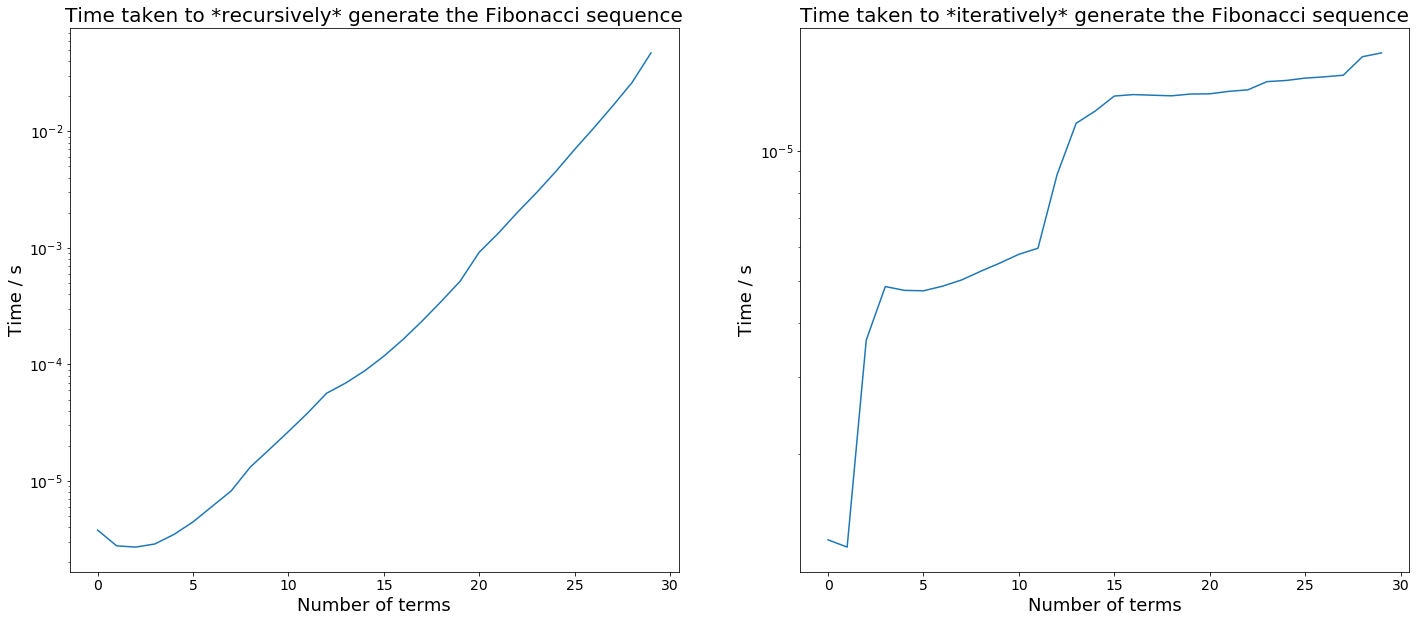

In [22]:
plt.figure(figsize=(24, 10), facecolor='white')

plt.subplot(1, 2, 1)
plt.plot(range(terms), recursion_times_averaged)
plt.xlabel('Number of terms', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Time / s', fontsize=18)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.title('Time taken to *recursively* generate the Fibonacci sequence', fontsize=20)

plt.subplot(1, 2, 2)
plt.plot(range(terms), iteration_times_averaged)
plt.xlabel('Number of terms', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Time / s', fontsize=18)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.title('Time taken to *iteratively* generate the Fibonacci sequence', fontsize=20)

plt.show()

**Conclusions:**
* Iteration is much, much faster in this case (n < 30)
* Recursion seems to scale exponentially with n (take the log to see a straight-line dependence)
* Iteration seems to scale roughly linearly